In [3]:
import torch

import dataset
from models import autoencoders
import os

In [7]:
device = "cuda:0"
pardir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
storage = 'ends/mae_kaimuni'
name = "checkpoint-25.pt"
path = os.path.join(pardir, storage, name)
aenet = autoencoders.CelebaAutoencoder(init_num_filters=64)

checkpoint = torch.load(path)
aenet.load_state_dict(checkpoint['model_state'])

<All keys matched successfully>

In [5]:
loaders = dataset.build_loader(
    dataset.CelebADataset,
    os.path.join(pardir, 'data'),
    64,
    2
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


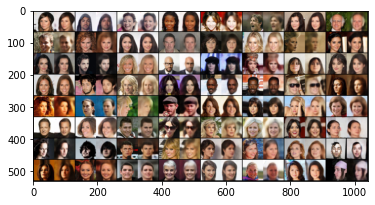

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

def plot_img(img, name):
    img = img.detach().cpu().numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.savefig(name)

imgs = next(iter(loaders['test']))
outp = aenet(imgs)

printimg = make_grid(torch.cat([imgs, outp], dim=3))
plot_img(printimg, 'mae_kaimuni_recon_test.png')